# Import Libaries 

In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [242]:
df1 = pd.read_csv('Resume.csv')

In [243]:
df2 = pd.read_csv('UpdatedResumeDataSet.csv')

In [244]:
df1.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [245]:
df2.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [249]:
# Create a new DataFrame with only the required columns and rename 'Resume_str' to 'Resume'
df = df1[['Category', 'Resume_str']].rename(columns={'Resume_str': 'Resume'})

In [250]:
df.head()

,Category,Resume
0,HR,HR ADMINISTRATOR/MARKETING ASSOCIATE\...
1,HR,"HR SPECIALIST, US HR OPERATIONS ..."
2,HR,HR DIRECTOR Summary Over 2...
3,HR,HR SPECIALIST Summary Dedica...
4,HR,HR MANAGER Skill Highlights ...


In [261]:
DF = pd.merge(df, df2, on='Category', how ='left')

In [263]:
DF = pd.concat([df, df2],ignore_index =True)

In [264]:
DF.to_csv('newCSV.csv',index=False)

In [265]:
# Display the first few rows of the updated DataFrame
DF.head()

,Category,Resume
0,HR,HR ADMINISTRATOR/MARKETING ASSOCIATE\...
1,HR,"HR SPECIALIST, US HR OPERATIONS ..."
2,HR,HR DIRECTOR Summary Over 2...
3,HR,HR SPECIALIST Summary Dedica...
4,HR,HR MANAGER Skill Highlights ...


In [266]:
DF.shape

(3446, 2)

# Exploring Categories

In [267]:
DF['Category']

0            HR
1            HR
2            HR
3            HR
4            HR
         ...   
3441    Testing
3442    Testing
3443    Testing
3444    Testing
3445    Testing
Name: Category, Length: 3446, dtype: object

In [268]:
DF['Category'].value_counts()

Category
HR                           154
INFORMATION-TECHNOLOGY       120
BUSINESS-DEVELOPMENT         120
ACCOUNTANT                   118
ADVOCATE                     118
ENGINEERING                  118
FINANCE                      118
CHEF                         118
AVIATION                     117
FITNESS                      117
SALES                        116
CONSULTANT                   115
HEALTHCARE                   115
BANKING                      115
CONSTRUCTION                 112
PUBLIC-RELATIONS             111
DESIGNER                     107
ARTS                         103
TEACHER                      102
APPAREL                       97
DIGITAL-MEDIA                 96
Java Developer                84
Testing                       70
AGRICULTURE                   63
DevOps Engineer               55
Python Developer              48
Web Designing                 45
Hadoop                        42
Data Science                  40
Operations Manager            40
B

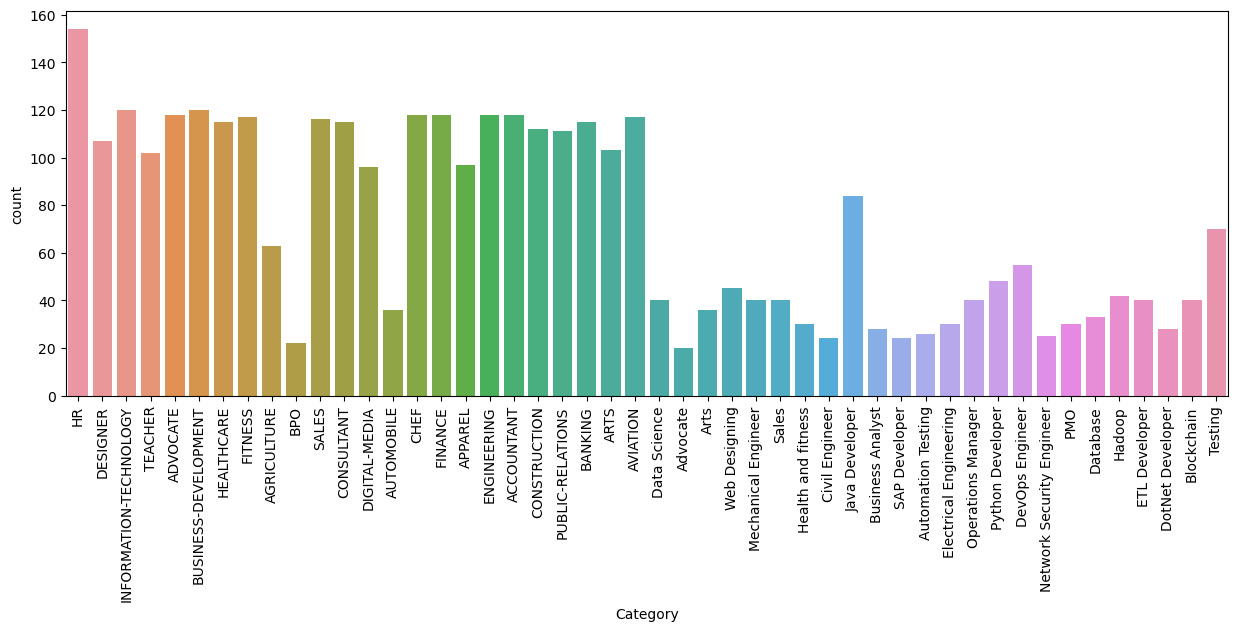

In [269]:
plt.figure(figsize=(15,5))
sns.countplot(x='Category', data=DF)
plt.xticks(rotation=90)
plt.show()

In [270]:
DF['Category'].unique()

array(['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION',
       'Data Science', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

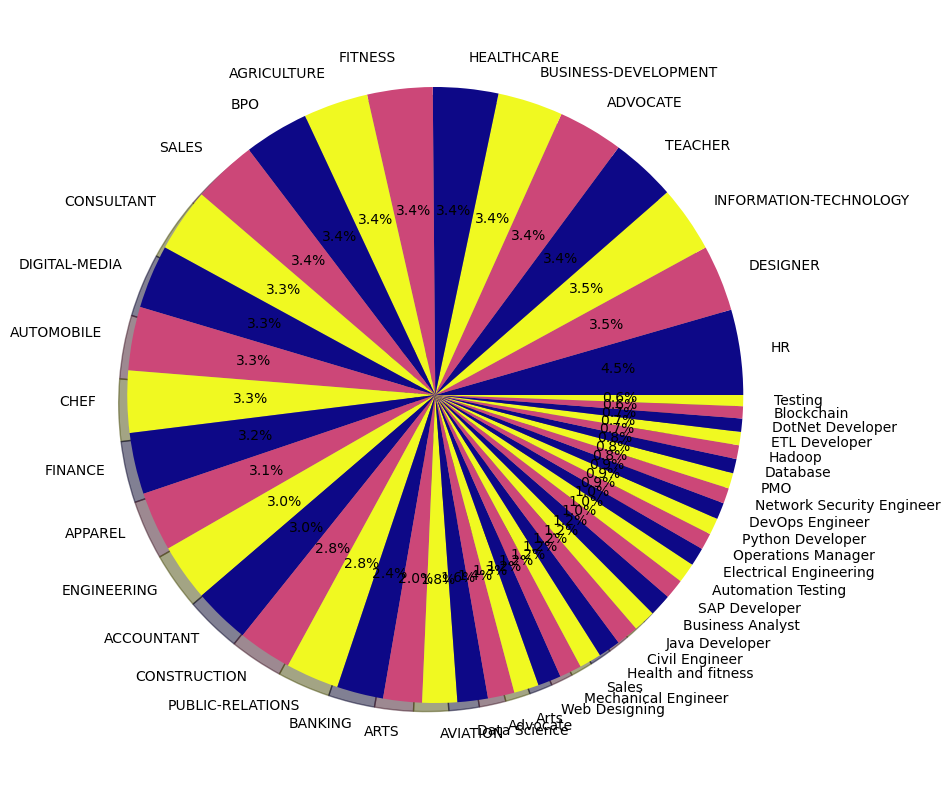

In [273]:
counts = DF['Category'].value_counts()
labels = DF['Category'].unique()
plt.figure(figsize=(15,10))
plt.pie(counts, labels=labels, autopct='%1.1f%%', shadow = True, colors = plt.cm.plasma(np.linspace(0,1,3)))
plt.show()

# Exploring Resume

In [274]:
DF

,Category,Resume
0,HR,HR ADMINISTRATOR/MARKETING ASSOCIATE\...
1,HR,"HR SPECIALIST, US HR OPERATIONS ..."
2,HR,HR DIRECTOR Summary Over 2...
3,HR,HR SPECIALIST Summary Dedica...
4,HR,HR MANAGER Skill Highlights ...
...,...,...
3441,Testing,Computer Skills: â¢ Proficient in MS office (...
3442,Testing,â Willingness to accept the challenges. â ...
3443,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
3444,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [275]:
DF['Category'][0]

'HR'

In [276]:
DF['Resume'][0]

"         HR ADMINISTRATOR/MARKETING ASSOCIATE\n\nHR ADMINISTRATOR       Summary     Dedicated Customer Service Manager with 15+ years of experience in Hospitality and Customer Service Management.   Respected builder and leader of customer-focused teams; strives to instill a shared, enthusiastic commitment to customer service.         Highlights         Focused on customer satisfaction  Team management  Marketing savvy  Conflict resolution techniques     Training and development  Skilled multi-tasker  Client relations specialist           Accomplishments      Missouri DOT Supervisor Training Certification  Certified by IHG in Customer Loyalty and Marketing by Segment   Hilton Worldwide General Manager Training Certification  Accomplished Trainer for cross server hospitality systems such as    Hilton OnQ  ,   Micros    Opera PMS   , Fidelio    OPERA    Reservation System (ORS) ,   Holidex    Completed courses and seminars in customer service, sales strategies, inventory control, loss pr

# Balance Classes (Categories)

In [277]:
# Check the original category distribution
print("Original Category Distribution:")
print(DF['Category'].value_counts())

# Get the largest category size (i.e., the category with the maximum number of entries)
max_size = DF['Category'].value_counts().max()

# Perform oversampling
balanced_DF = DF.groupby('Category').apply(lambda x: x.sample(max_size, replace=True)).reset_index(drop=True)

# Shuffle the dataset to avoid any order bias
DF = balanced_DF.sample(frac=1).reset_index(drop=True)

# Check the balanced category distribution
print("\nBalanced Category Distribution (After Oversampling):")
print(DF['Category'].value_counts())

Original Category Distribution:
Category
HR                           154
INFORMATION-TECHNOLOGY       120
BUSINESS-DEVELOPMENT         120
ACCOUNTANT                   118
ADVOCATE                     118
ENGINEERING                  118
FINANCE                      118
CHEF                         118
AVIATION                     117
FITNESS                      117
SALES                        116
CONSULTANT                   115
HEALTHCARE                   115
BANKING                      115
CONSTRUCTION                 112
PUBLIC-RELATIONS             111
DESIGNER                     107
ARTS                         103
TEACHER                      102
APPAREL                       97
DIGITAL-MEDIA                 96
Java Developer                84
Testing                       70
AGRICULTURE                   63
DevOps Engineer               55
Python Developer              48
Web Designing                 45
Hadoop                        42
Data Science                  40
Op

C:\Users\aveng\AppData\Local\Temp\ipykernel_1928\3444681709.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_DF = DF.groupby('Category').apply(lambda x: x.sample(max_size, replace=True)).reset_index(drop=True)


# Cleaning Data

      Url's
      hashtags
      mentions
      special letters
      punctuations 

In [278]:


import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText



In [279]:
cleanResume("my #### $ #  #noorsaeed webiste like is this http://heloword and access it @gmain.com")

'my webiste like is this and a ess it '

In [280]:
DF.columns = DF.columns.str.strip()  # Removes leading/trailing spaces
DF.columns = DF.columns.str.lower()  # Makes all columns lowercase
print(DF.columns)

Index(['category', 'resume'], dtype='object')


In [281]:
DF['resume'] = DF['resume'].apply(lambda x: cleanResume(x))  #  correct after lowercasing

In [282]:
DF['resume'] 

0       Education Details June 2014 to June 2018 BE Me...
1       Education Details Electrical engineering Skill...
2        NX UNIGRAPHICS DESIGNER Summary Highlights Vi...
3       Education Details May 2013 Master Computer App...
4        Good logical and analytical skills Positive a...
                              ...                        
7387     OPERATION MANAGER www linkedin com in raymond...
7388    TECHNICAL SKILLS Operating Systems MS Windows ...
7389     REGISTERED NURSE CLINICAL CARE COORDINATOR FI...
7390    PERSONAL SKILLS Quick learner Eagerness to lea...
7391    Areas of Expertise Oracle Databases 12c 11g 10...
Name: resume, Length: 7392, dtype: object

In [283]:
DF['resume'] [0]

'Education Details June 2014 to June 2018 BE Mechanical Engineering Pune Maharashtra Savitribai Phule Pune University Mechanical Design Engineer Mechanical design engineer Skill Details Microsoft office Autocad Catia Solidworks Exprience 6 monthsCompany Details company Push Engineering Pvt ltd description Currently I am working as mechanical design engineer in Push engineering Pvt ltd All types of ice making plant are designed and manufactured in our company Design includes design of pressure vessel condenser conveyor with the help of 3d modelling software Also BOM Preparation of material ERP System company Central Water and Power Research Station description Pune Govt of India 1 year experience as a Research assistant of R D Department of mechanical workshop at Central Water and Power Research Station Khadakwasla Pune Govt of india Experiences different project of generation of sea waves in laboratory useful for design of port and harbor structures of Mumbai Chennai Goa and foreign co

# Words into categorical values

In [284]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [285]:
le.fit(DF['category'])
DF['category'] = le.transform(DF['category'])

In [286]:
DF

,category,resume
0,36,Education Details June 2014 to June 2018 BE Me...
1,27,Education Details Electrical engineering Skill...
2,19,NX UNIGRAPHICS DESIGNER Summary Highlights Vi...
3,43,Education Details May 2013 Master Computer App...
4,46,Good logical and analytical skills Positive a...
...,...,...
7387,6,OPERATION MANAGER www linkedin com in raymond...
7388,22,TECHNICAL SKILLS Operating Systems MS Windows ...
7389,1,REGISTERED NURSE CLINICAL CARE COORDINATOR FI...
7390,46,PERSONAL SKILLS Quick learner Eagerness to lea...


In [287]:
df.Category.unique()

array(['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION'],
      dtype=object)

In [288]:
DF.category.unique()

array([36, 27, 19, 43, 46, 30, 22, 37, 31, 15, 17, 34, 45, 16,  2, 41, 26,
       32,  9, 20, 10, 47, 44, 40, 21, 14, 24, 12,  6,  4, 28, 13,  8,  7,
        0, 11, 35,  3,  1,  5, 23, 18, 39, 29, 42, 25, 38, 33])

# Vectorization 

In [289]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words ='english')


tfidf.fit(DF['resume'])
requredTaxt = tfidf.transform(DF['resume'])

In [290]:
requredTaxt

<7392x36369 sparse matrix of type '<class 'numpy.float64'>'
	with 1854866 stored elements in Compressed Sparse Row format>

# Splitting

In [291]:
from sklearn.model_selection import train_test_split

In [292]:
X_train, X_test, y_train, y_test = train_test_split(requredTaxt,DF['category'] , test_size = 0.2, random_state = 42)

In [293]:
X_train.shape

(5913, 36369)

In [294]:
X_test.shape

(1479, 36369)

# Now let's train the model and print the classification report:

In [295]:
from sklearn.linear_model import LogisticRegression

clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)
print(accuracy_score(y_test, ypred))


0.8891142663962136


In [298]:
# 3. Train RandomForestClassifier
rf_model = OneVsRestClassifier(RandomForestClassifier())
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("\nRandomForestClassifier Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_rf)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_rf)}")


RandomForestClassifier Results:
Accuracy: 0.9324
Confusion Matrix:
[[29  0  0 ...  0  0  0]
 [ 0 32  0 ...  1  0  0]
 [ 0  0 35 ...  0  0  0]
 ...
 [ 0  0  0 ... 21  0  0]
 [ 0  0  0 ...  0 24  0]
 [ 0  0  0 ...  0  0 32]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        30
           1       0.86      0.86      0.86        37
           2       0.95      0.92      0.93        38
           3       0.89      0.86      0.87        28
           4       0.89      0.76      0.82        33
           5       1.00      1.00      1.00        33
           6       0.88      0.82      0.85        34
           7       0.96      1.00      0.98        23
           8       1.00      1.00      1.00        28
           9       1.00      1.00      1.00        30
          10       0.83      0.86      0.85        35
          11       1.00      1.00      1.00        30
          12       0.85      0.72      0.78       

In [299]:
ypred

array([38, 17,  0, ..., 43, 41, 42])

# Save files

In [300]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(svc_model, open('clf.pkl', 'wb'))
pickle.dump(le, open("encoder.pkl",'wb'))

# Prediction System

In [301]:
# Function to predict the category of a resume
def pred(input_resume):
    # Preprocess the input text (e.g., cleaning, etc.)
    cleaned_text = cleanResume(input_resume) 

    # Vectorize the cleaned text using the same TF-IDF vectorizer used during training
    vectorized_text = tfidf.transform([cleaned_text])
    
    # Convert sparse matrix to dense
    vectorized_text = vectorized_text.toarray()

    # Prediction
    predicted_category = clf.predict(vectorized_text)

    # get name of predicted category
    predicted_category_name = le.inverse_transform(predicted_category)

    return predicted_category_name[0]  # Return the category name